In [94]:
# Practica 01

# Bibliotecas
import pandas as pd
import numpy as np


df = pd.read_csv("datos.csv")
df = df.fillna(0)
df

,nombre,apellido,horas_dedicadas,calificaciones_obtenida
0,Sofía Sánchez,Rodríguez,52,45.0
1,Luis Romero,Romero,2,0.0
2,Juan Díaz,López,170,100.0
3,Miguel Hernández,Álvarez,42,0.0
4,Juan González,Díaz,125,70.0
5,Juan García,Fernández,47,40.0
6,Luis Romero,López,149,100.0
7,Miguel Fernández,Romero,162,80.0
8,Carmen Pérez,Álvarez,139,45.0
9,Juan Rodríguez,Romero,18,30.0


In [95]:
# 1. Encontrar el mínimo, máximo, media y desviación estándar tanto para el 
# número de horas dedicadas como para las calificaciones obtenidas.

print("HORAS:")
min_horas = df["horas_dedicadas"].min()
print("-Mínimo de horas dedicadas: ", min_horas)

max_horas = df["horas_dedicadas"].max()
print("-Máximo de horas dedicadas: ", max_horas)

dev_horas = df["horas_dedicadas"].std()
print("-Desviación estándar de horas dedicadas: ", dev_horas)


print("CALIFICACIONES:")
min_calif = df["calificaciones_obtenida"].min()
print("-Mínimo de calificaciones: ", min_calif)

max_calif = df["calificaciones_obtenida"].max()
print("-Máximo de calificaciones: ", max_calif)

dev_calif = df["calificaciones_obtenida"].std()
print("-Desviación estándar de calificaciones: ", dev_calif)

HORAS:
-Mínimo de horas dedicadas:  2
-Máximo de horas dedicadas:  178
-Desviación estándar de horas dedicadas:  58.129075974801204
CALIFICACIONES:
-Mínimo de calificaciones:  0.0
-Máximo de calificaciones:  100.0
-Desviación estándar de calificaciones:  37.35219996339256


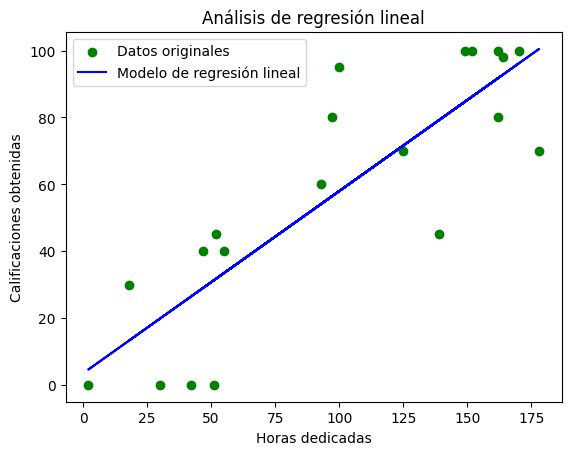

In [96]:
# Lleva a cabo un análisis de regresion lineal utilizando estos datos 
# y presenta un gráfico que muestre el modelo de regresión junto con 
# los datos originales.

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = np.array(df["horas_dedicadas"])
y = np.array(df["calificaciones_obtenida"])

x = x.reshape(-1,1)

modelo = LinearRegression()
modelo.fit(x,y)

#Gráfica:
plt.scatter(x, y, color='green', label='Datos originales')
plt.plot(x, modelo.predict(x), color='blue', label='Modelo de regresión lineal')
plt.title('Análisis de regresión lineal')
plt.xlabel('Horas dedicadas')
plt.ylabel('Calificaciones obtenidas')
plt.legend()
plt.grid(False)

# Mostrar la gráfica
plt.show()


In [97]:
# 3. Utiliza el modelo de regresión para realizar una predicción de la calificación
# de un estudiante que hubiera dedicado n horas en el semestre a la materia
# (donde n es la suma de los dígitos de su número de cuenta módulo 50).

n = (3+1+5+6+5+0+3+8+3)%50
prediccion = modelo.predict([[n]])
print(f"Predicción de la calificación de un estudiante después de haber dedicado {n} horas a la materia:")
print(f"{prediccion[0]}")


Predicción de la calificación de un estudiante después de haber dedicado 34 horas a la materia:
22.0076478797772


In [98]:
# Investiga métodos para evaluar la bondad de ajuste de tu modelo y deter-
# minar cuán efectivamente explica el comportamiento de los datos.

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

predicciones = modelo.predict(x)

"""
El error absoluto es la cantidad de error en las medidas obtenidas, 
es la diferencia entre el valor obtenido y el valor real.
El MAE valor medio absoluto encuentra todos los errores absolutos, 
los suma y los divide por el número de errores.
En este caso, el modelo tiene en promedio un error de 16.01 respecto
a los valores reales.
"""
mae = mean_absolute_error(y, predicciones)

"""
MSE es valor medio de los cuadrados de la diferencia entre los 
valores obtenidos en la predicción del modelo y los valores reales. 
En promedio, las predicciones del modelo tienen un error cuadrático
de 372 respecto a los valores reales.
"""
mse = mean_squared_error(y, predicciones)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

Mean Absolute Error: 16.012165580491214
Mean Squared Error: 372.0000306849759
